In [1]:
from PIL import Image, ImageFilter
import numpy as np
import os

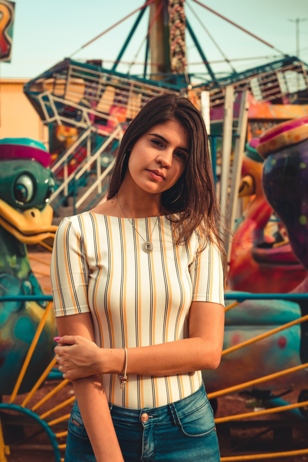

In [2]:
# me = Image.open("also_me.jpg").transpose(Image.ROTATE_90).filter(ImageFilter.GaussianBlur(2))
me = Image.open("pexels-leonne-brito-1844012.jpg").filter(ImageFilter.GaussianBlur(2))
me.resize(np.array(me.size)//10)

In [3]:
np.array(me).shape

(4629, 3086, 3)

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

print("Making estimators")
estimators = {f"{i}-clusters": KMeans(i, n_init='auto') for i in tqdm(range(10,100,10))}
colors_all = np.array(me).reshape((-1, 3))
print("Fitting estimators")
for e in tqdm(estimators):
    # print(f"Fitting estimator {e}")
    estimators[e].fit(colors_all)

Making estimators


100%|██████████| 9/9 [00:00<00:00, 52943.53it/s]


Fitting estimators


100%|██████████| 9/9 [09:37<00:00, 64.11s/it]


In [9]:
try:
    os.mkdir("girl")
except FileExistsError:
    print("adding to existing dir")
shape = np.array(me).shape
colors_all = np.array(me).reshape((-1, 3))
for e in tqdm(estimators):
    cols = np.array(list(map(lambda i:estimators[e].cluster_centers_[i], estimators[e].predict(colors_all))))
    img = Image.fromarray(cols.reshape(shape).astype("uint8"))
    img.save(os.path.join("girl", f"{e}.png"))


adding to existing dir


100%|██████████| 9/9 [01:52<00:00, 12.46s/it]


In [12]:
byte_size = np.multiply(*me.size)*3
print(f"Original File Size: {round(byte_size/10**4)/10**2}MB")

Original File Size: 42.86MB


In [27]:
def compressed_size(n_centers):
    # n_centers = 90
    pixel_count = np.multiply(*me.size)
    return pixel_count+n_centers*3
print(f"Compressed File Size: {round((compressed_size(90))/10**4)/10**2}MB")

Compressed File Size: 14.29MB
